# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

## Second notebook on Random variables

Lets take a look again at the spam dataset and look at our concepts there

In [3]:
from Utils import load_sms, emfToEdf

sms_data = load_sms()
# sms_data[:5]
sms_data[1169]

('Msgs r not time pass.They silently say that I am thinking of U right now and also making U think of me at least 4 a moment. Gd nt.swt drms @Shesil',
 0)

Let X represents each SMS text (an entry in the list), and let $Y$ represent whether text is spam or not i.e. $Y \in \{0,1\}$. Thus $\mathbb{P}(Y = 1)$ is the probability that we get a spam. The goal is to estimate:
$$
    \mathbb{P}(Y = 1 | \text{"free" or "prize" is in } X) \enspace .
$$
That is, the probability that the SMS is spam given that "free" or "prize" occurs in the SMS. 
Hint: it is good to remove the upper/lower case of words so that we can also find "Free" and "Prize"; this can be done with `text.lower()` if `text` a string.

To do this we can create a new random variable $Z$ which is $1$ if "free" or "prize" appears in $X$.

In [4]:
interesting_words = set(['free', 'prize'])
TF10 = {True: 1, False: 0}
Z_obs = [TF10[not interesting_words.isdisjoint([word.lower() for word in line[0].split(' ')])] for line in sms_data]

In [5]:
Z_obs[:10]

[0, 0, 1, 0, 0, 0, 0, 0, 1, 1]

In [6]:
Y_obs = [y for x, y in sms_data]
Y_obs[:10]

[0, 0, 1, 0, 0, 1, 0, 0, 1, 1]

In [7]:
import numpy as np


def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(y <= x[0]) and (z <= x[1])] for y, z in zip(Y_obs, Z_obs)])

In [8]:
F_X_12([1, 0])

0.9551328068916008

This is the JDF for this problem

In [9]:
print("\tz <= 0 \t\tz <= 1")
for x1 in range(0, 2):
    print("y <= %d \t" % x1, end='')
    for x2 in range(0, 2):
        print("%.2f" % (F_X_12((x1, x2))), end='\t\t')
    print('\n')

	z <= 0 		z <= 1
y <= 0 	0.86		0.87		

y <= 1 	0.96		1.00		



In [10]:
F_X_12((1, 0))

0.9551328068916008

In [11]:
F_X_12((0, 0)) == F_X_12((0, 1)) * F_X_12((1, 0))

False

In [12]:
F_X_12((0, 1)) * F_X_12((1, 0))

0.8270846721557743

In [13]:
# Are they indepdentent? If so, then the JDF is just the product of the 
# DFs for Y and Z, but
0.865936826992103 * 0.955132806891601

0.827084672155774

Which is not 0.858, so they are not independent. So lets try to estimate the probability that $Y=1$ given that $Z = 1$. Lets again do that by filtering

In [14]:
np.mean([y for z, y in zip(Z_obs, Y_obs) if z == 1])

0.812

Compare that with the marginal probability of $Y = 1$, which is according to our JDF 1-0.866 = 0.134

In [15]:
# Or we can just compute it directly
np.mean(Y_obs)

0.13406317300789664

What we see from this is that knowing that the words "free" or "prize" appeared in the sms text, we are much more certain that it is a spam. We also see that looking directly at the JDF this can be hard to see, although it is equivalent.

In [16]:
x = np.random.normal(size=100)

In [17]:
np.mean(x)

-0.07593380524030627

In [18]:
g = lambda x: x ** 2

In [19]:
mean = np.mean(x)
y = x - mean
np.mean(y ** 4)

1.8698245693974394

## Moments etc

In [20]:
import numpy as np

x = np.random.normal(size=100)

In [21]:
x

array([ 0.05675015, -1.30685808, -0.44811238,  0.353403  , -0.2089589 ,
        1.78212617,  0.21457045,  0.18695102, -3.17505823,  0.26886523,
       -0.68857895, -1.62243033, -2.03533692, -0.32290653, -0.28394751,
       -0.78685954, -0.68276881, -0.31517596, -0.68458565,  0.24432789,
        0.24103492,  1.72626727, -1.36234231,  0.73680743, -0.02823739,
        0.67565924, -1.96264348, -0.02403848, -0.71654766, -1.00604385,
        0.86463023, -0.08818911, -0.39593629,  0.54655341, -0.26621933,
       -2.6010019 ,  0.51570113, -0.44657111, -0.18839995,  0.37750352,
       -1.2422399 ,  1.33808994, -0.39155907, -0.68796881, -0.41511169,
        0.06089008,  0.55321713, -0.61832247, -0.1405086 ,  2.26354221,
        0.36193072, -0.08391184,  0.0267485 ,  0.39152166,  1.08960871,
       -0.97875903,  2.24708437, -1.83753206,  0.60898339,  0.40521707,
        0.69375951, -0.92287382,  0.52485692,  0.75540037,  1.03552791,
       -1.73450711,  0.2180681 , -0.3737458 ,  1.43969053, -1.34

## Sample mean

In [22]:
np.mean(x)

-0.08211141471393825

## Sample variance

In [23]:
np.var(x)

1.0602741739510835

Or by doing it yourself

In [24]:
mu = np.mean(x)
np.mean(np.power(x - mu, 2))

1.0602741739510835

Higher moments, we can use `scipy`

In [25]:
from scipy.stats import skew, kurtosis

In [26]:
skew(x)

-0.29951851072914043

In [27]:
kurtosis(x, fisher=False)

3.3207059252692717

## Moments and tail behavior

In [28]:
def standardize(data):
    mean = np.mean(data)
    std = np.sqrt(np.var(data))
    return (data - mean) / std

(-3.0, 5.0)

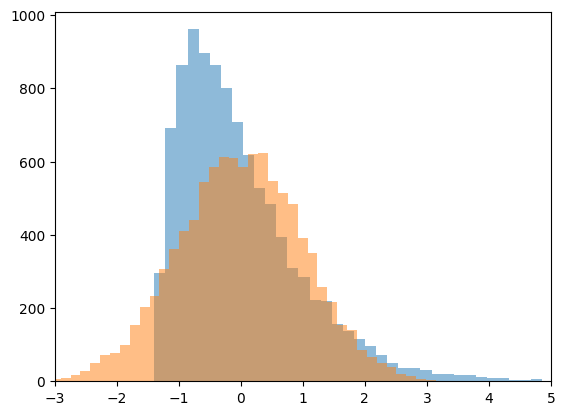

In [29]:
import numpy as np

chi2 = np.random.chisquare(4, size=10000)
normal = np.random.normal(size=10000)
import matplotlib.pyplot as plt

_ = plt.hist(standardize(chi2), bins=50, alpha=0.5)
_ = plt.hist(standardize(normal), bins=50, alpha=0.5)
plt.xlim(-3, 5)

In [30]:
from scipy.stats import skew, kurtosis


def print_basic_stats(data):
    print("mean: %.2f\tstd: %.2f\tskew: %.2f\tkurtosis: %.2f" % (
    np.mean(data), np.std(data), skew(data), kurtosis(data, fisher=False)))

In [31]:
print_basic_stats(standardize(normal))

mean: -0.00	std: 1.00	skew: -0.04	kurtosis: 2.94


In [32]:
print_basic_stats(standardize(chi2))

mean: 0.00	std: 1.00	skew: 1.40	kurtosis: 5.87


In [33]:
print_basic_stats(standardize(np.sqrt(chi2)))

mean: 0.00	std: 1.00	skew: 0.41	kurtosis: 3.03


In [34]:
np.mean(np.power(standardize(chi2), 3))  # Skewness

1.403055596154292

In [35]:
np.mean(np.power(standardize(chi2), 4))  # kurtosis

5.867093223701011

## Transformations of random variables

Consider a Binomial random variable

In [36]:
n = 10
p = 0.5
x = np.random.binomial(n, p, size=1000)

Lets plot the empirical density

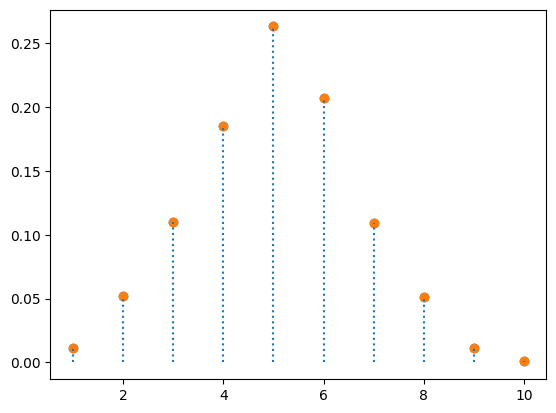

In [37]:
from Utils import makeEMF, makeEDF, plotEDF, plotEMF

plotEMF(makeEMF(x))

If we had the function $g(x) = \sin(x/3)$

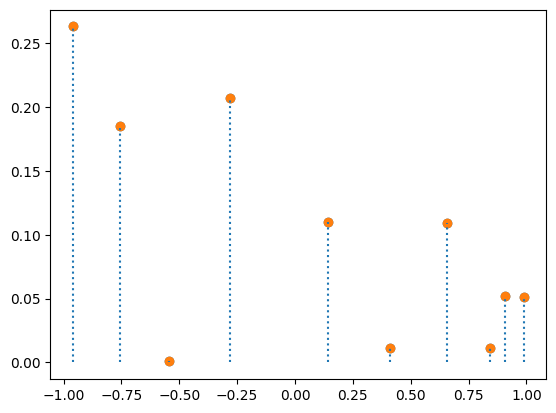

In [38]:
plotEMF(makeEMF(np.sin(x)))

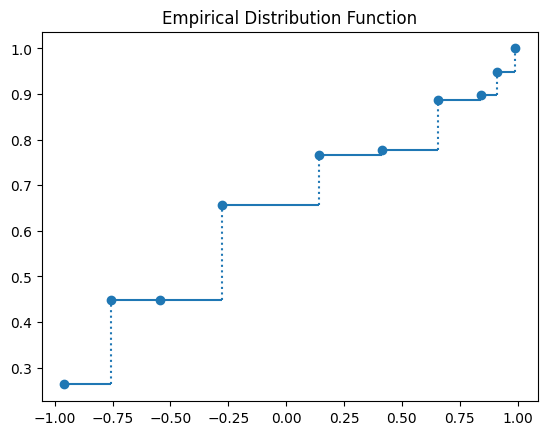

In [39]:
plotEDF(makeEDF(np.sin(x)))

Can we compute this thing?
What is $\sin^{[-1]}$?

Since $X$ is discrete, we can check what $\mathbb{Y}$ is, since $\mathbb{X}=\{0,1,\ldots,10\}$.

In [40]:
Y_space = np.sort(np.sin(np.arange(0, 11)))
sin_inv = dict(zip(np.sin(np.arange(0, 11)), np.arange(0, 11)))

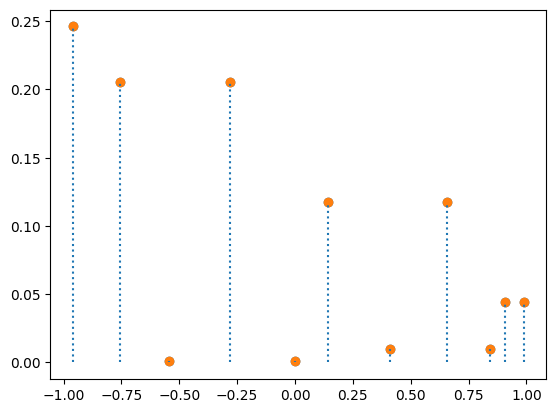

In [41]:
from scipy.special import binom as binomial

plotEMF([(y, binomial(n, sin_inv[y]) * (p ** sin_inv[y]) * ((1 - p) ** (n - sin_inv[y]))) for y in Y_space])

In [43]:
plotEDF(emfToEdf([(y, binomial(n, sin_inv[y]) * (p ** sin_inv[y]) * ((1 - p) ** (n - sin_inv[y]))) for y in Y_space]))

NameError: name 'emfToEdf' is not defined